<h2 style='color:blue' align='center'>Sports Celebrity Image Classification: Data Cleaning<h2>

In [ ]:
#pip install opencv-python

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4>

#### Now how do you detect face and eyes?

In [2]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

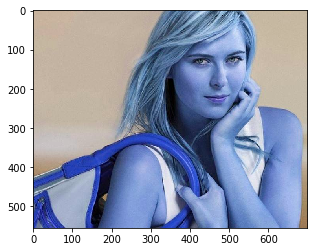

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)# converting color image to grayscale
gray.shape

(555, 700)

In [8]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

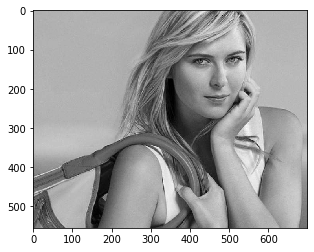

In [9]:
plt.imshow(gray, cmap='gray')

In [10]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [11]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

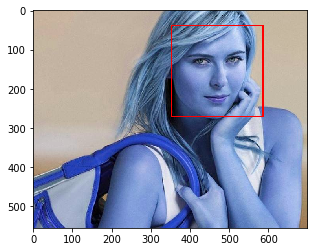

In [12]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

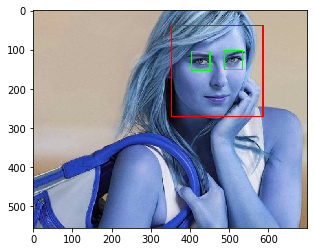

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

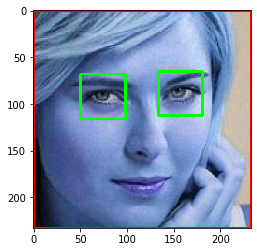

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

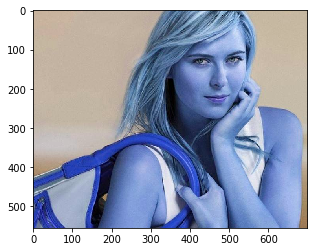

In [16]:
original_image = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_image)

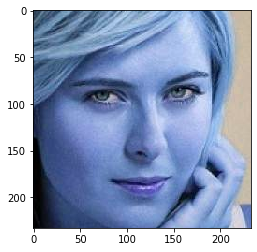

In [17]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)# if eyes is not clear visible then it not return anythings

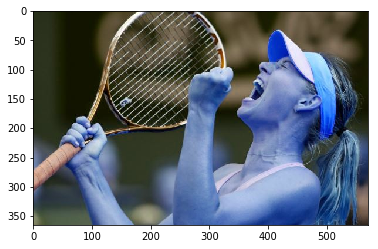

In [15]:
org_image_obstructed = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(org_image_obstructed)

In [18]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
cropped_image_no_2_eyes

In [19]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [20]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):# it is gives to all subfolder directories 
    if entry.is_dir():# it is checking entry is subdirectory or subfolder or not
        #print( entry.is_dir())
        img_dirs.append(entry.path)# if yes then subfolder names append int img_dir

In [21]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [22]:
import shutil
if os.path.exists(path_to_cr_data):# if here is folder exists then it is remove the folder
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)# then it is create the folder

In [23]:
{
    'lionel_messi': [
        './datasets/cropped/messi/messi1.png'
        './datasets/cropped/messi/messi2.png'
    ],
     'virat kohli': [
        './datasets/cropped/kohli/kohli 1.png'
        './datasets/cropped/kohli/kohli2.png'
    ],
    
    
}

{'lionel_messi': ['./datasets/cropped/messi/messi1.png./datasets/cropped/messi/messi2.png'],
 'virat kohli': ['./datasets/cropped/kohli/kohli 1.png./datasets/cropped/kohli/kohli2.png']}

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]# firtst spliting the the folder by / then take it last token
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []# intialize dirctonary with empty
    
    for entry in os.scandir(img_dir):# it going to each subfolder and iterating each images
        roi_color = get_cropped_image_if_2_eyes(entry.path)# then this folder path apply to folder if faces and eyes are visible clear
        if roi_color is not None: # region of interst is none
            cropped_folder = path_to_cr_data + celebrity_name # create folder name for sportsmen
            if not os.path.exists(cropped_folder):# if ther is no cropped foleder then first create the cropped folder
                os.makedirs(cropped_folder)# create the folders
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"# saving images like kohli, 1.2,3
            cropped_file_path = cropped_folder + "/" + cropped_file_name# append into cropped_file_path
            cv2.imwrite(cropped_file_path, roi_color)# stored cropped_file_path with region of interest
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)# creating the dictionary with clebratity name
            count += 1    

cropped
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
